In [1]:
#Importing all the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,f1_score,precision_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Reading the dataset
df=pd.read_csv('C:/Users/User/Documents/Data Trained/Data Science Class resources/DSData-master/Census_data.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
target            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'target'],
      dtype='object')

In [7]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
target            object
dtype: object

In [8]:
#Checking the null values(if any)
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

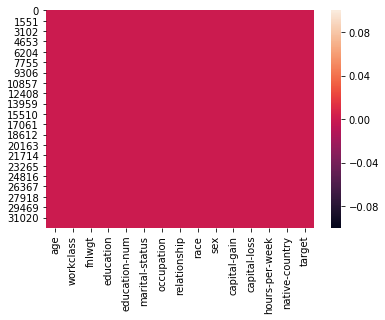

In [9]:
sns.heatmap(df.isnull())
plt.show()

In [10]:
#Statistical Summary of the Data
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
        'hours-per-week'],
       dtype='object'),
 dtype('O'): Index(['workclass', 'education', 'marital-status', 'occupation',
        'relationship', 'race', 'sex', 'native-country', 'target'],
       dtype='object')}

In [12]:
for i in df:
    print(i)
    print(df[i].unique(),'\n')
    print(df[i].value_counts(),'\n')

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 

36    898
31    888
34    886
23    877
35    876
33    875
28    867
30    861
37    858
25    841
27    835
32    828
38    827
39    816
29    813
41    808
24    798
40    794
26    785
42    780
43    770
22    765
20    753
46    737
45    734
44    724
21    720
19    712
47    708
50    602
     ... 
60    312
61    300
62    258
63    230
64    208
65    178
67    151
66    150
68    120
69    108
70     89
71     72
72     67
73     64
74     51
76     46
75     45
90     43
77     29
78     23
80     22
79     22
81     20
82     12
84     10
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64 

workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' 

In [13]:
df_int = df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss','hours-per-week']].copy()

In [14]:
df_object=df[['workclass', 'education', 'marital-status', 'occupation',
        'relationship', 'race', 'sex', 'native-country', 'target']].copy()

In [15]:
df_int.isnull().sum()

age               0
fnlwgt            0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

In [16]:
df_object.isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
target            0
dtype: int64

In [17]:
df_object.dtypes

workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
native-country    object
target            object
dtype: object

In [18]:
df_object

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,target
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,Jamaica,<=50K
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,>50K
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K


In [19]:
df_object['workclass'] = df_object['workclass'].str.strip().map(lambda x: np.nan if x=="?" else x)

In [20]:
df_object['occupation'] = df_object['occupation'].str.strip().map(lambda x: np.nan if x=="?" else x)

In [21]:
df_object['native-country'] = df_object['native-country'].str.strip().map(lambda x: np.nan if x=="?" else x)

In [22]:
df_object.isnull().sum()

workclass         1836
education            0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
native-country     583
target               0
dtype: int64

In [23]:
#filling the missing values
print(df['workclass'].mode())
print(df['occupation'].mode())
print(df['native-country'].mode())

0     Private
dtype: object
0     Prof-specialty
dtype: object
0     United-States
dtype: object


In [24]:
df_object['workclass'].fillna(df_object['workclass'].mode()[0], inplace=True)

In [25]:
df_object['occupation'].fillna(df_object['occupation'].mode()[0], inplace=True)

In [26]:
df_object['native-country'].fillna(df_object['native-country'].mode()[0], inplace=True)

In [27]:
df_object.isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
target            0
dtype: int64

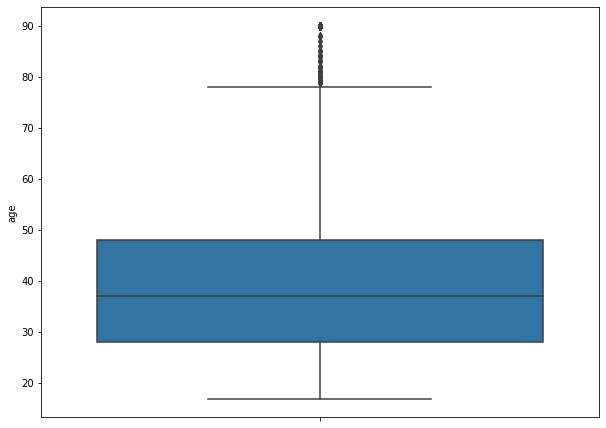

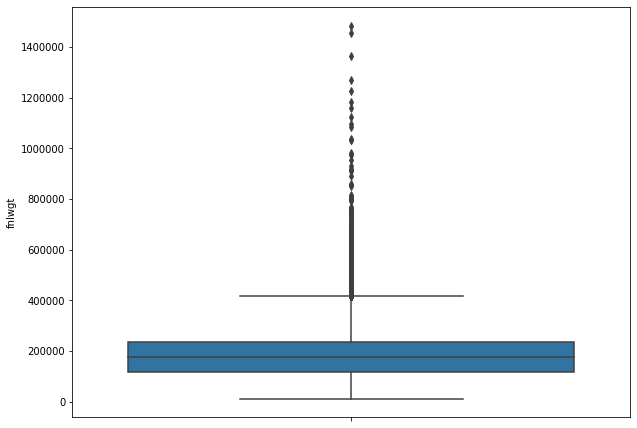

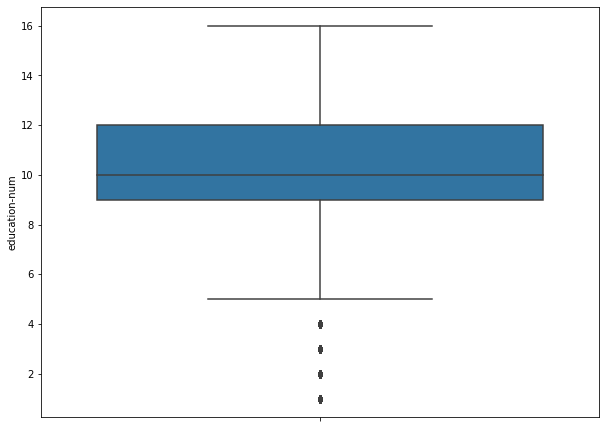

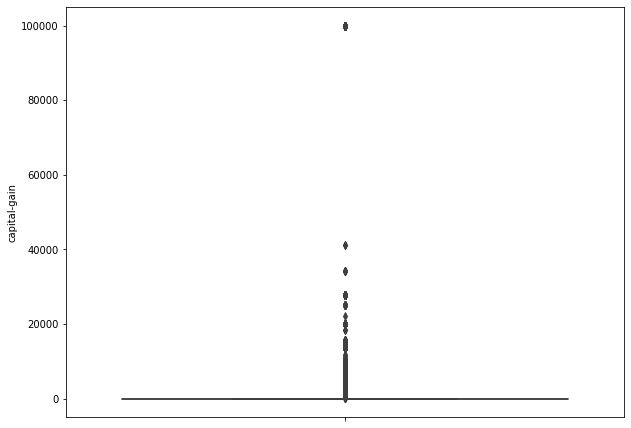

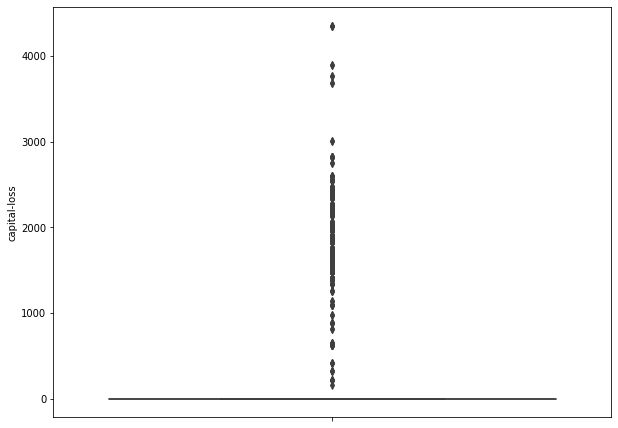

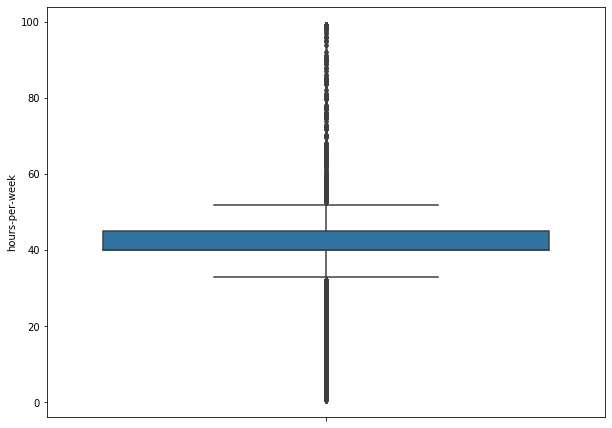

In [28]:
for i in df_int:
    plt.figure(figsize=(10,80))
    plt.subplot(911)
    sns.boxplot(df_int[i],orient='v')

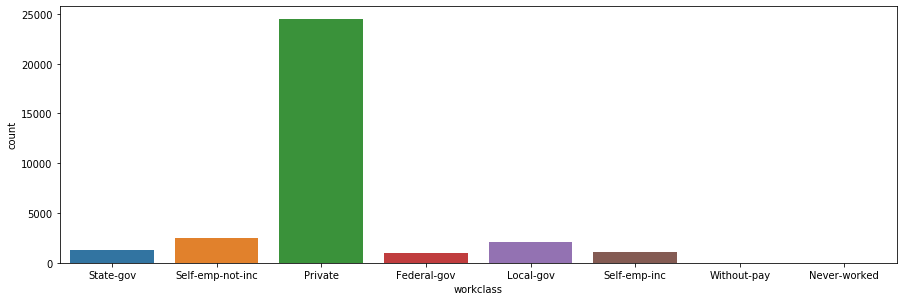

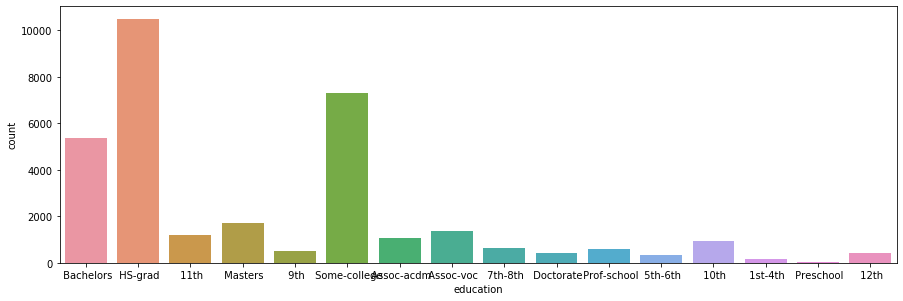

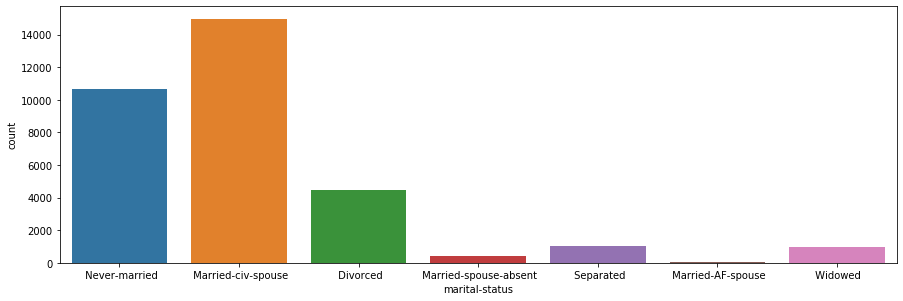

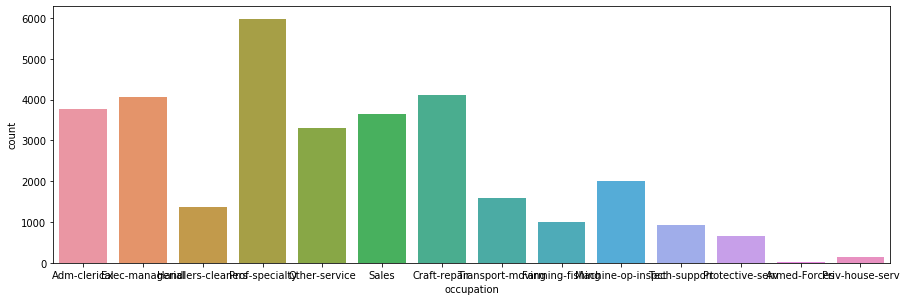

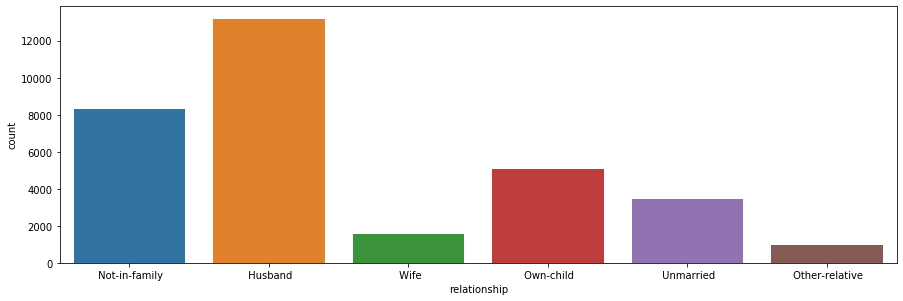

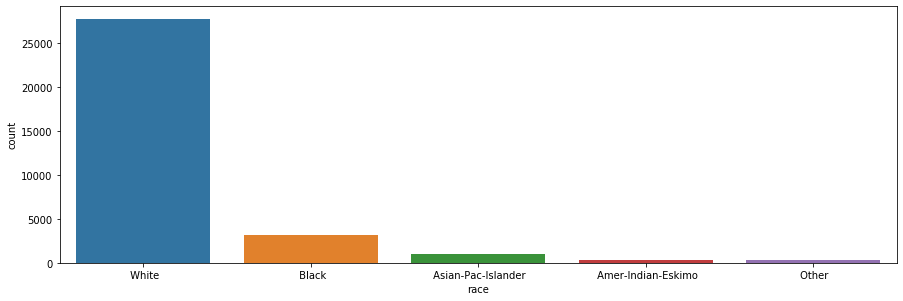

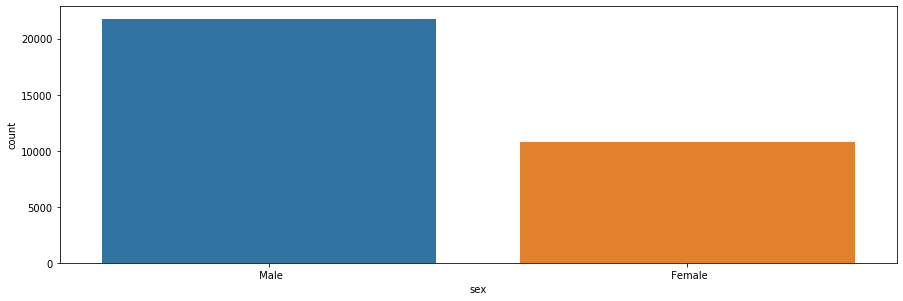

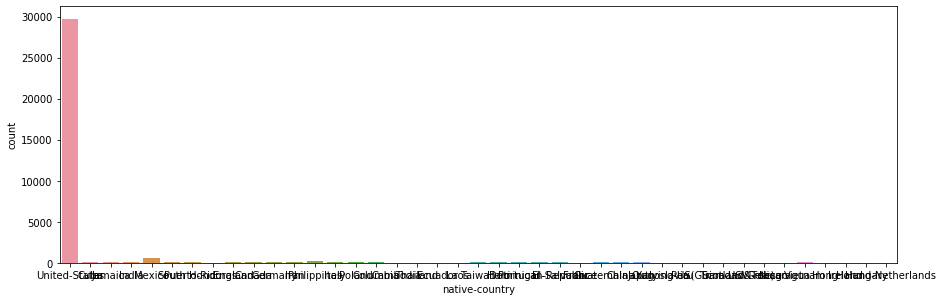

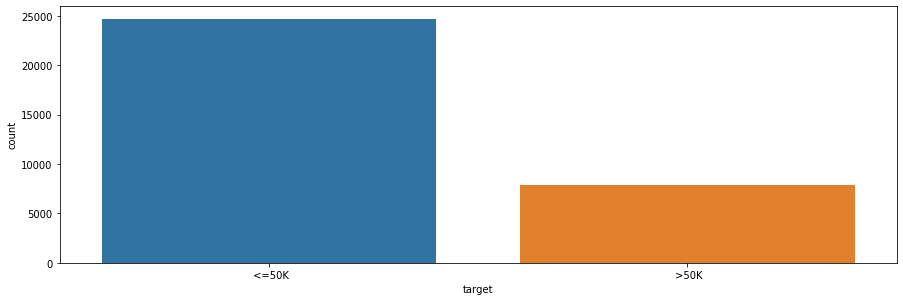

In [29]:
for i in df_object:
    plt.figure(figsize=(15,50))
    plt.subplot(911)
    sns.countplot(df_object[i])

In [30]:
for i in df_object:
    print(i)
    print(df_object[i].unique(),'\n')
    print(df_object[i].value_counts(),'\n')

workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64 

education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64 

marital-status
[' Never-married' ' 

In [31]:
le=LabelEncoder()
for i in df_object:
    df_object[i]=le.fit_transform(df_object[i])


In [32]:
df_object
df_object.shape

(32561, 9)

In [33]:
df_final=pd.concat([df_int,df_object],axis=1)
df_final.shape

(32561, 15)

In [34]:
df_final

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,target
0,39,77516,13,2174,0,40,6,9,4,0,1,4,1,38,0
1,50,83311,13,0,0,13,5,9,2,3,0,4,1,38,0
2,38,215646,9,0,0,40,3,11,0,5,1,4,1,38,0
3,53,234721,7,0,0,40,3,1,2,5,0,2,1,38,0
4,28,338409,13,0,0,40,3,9,2,9,5,2,0,4,0
5,37,284582,14,0,0,40,3,12,2,3,5,4,0,38,0
6,49,160187,5,0,0,16,3,6,3,7,1,2,0,22,0
7,52,209642,9,0,0,45,5,11,2,3,0,4,1,38,1
8,31,45781,14,14084,0,50,3,12,4,9,1,4,0,38,1
9,42,159449,13,5178,0,40,3,9,2,3,0,4,1,38,1


In [35]:
#Separating the variables like indenpendent and the target variable
x=df_final.drop(columns=["target"])
y=df_final[["target"]]

In [36]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [37]:
from sklearn.decomposition import PCA
pca=PCA(5)
x=pca.fit_transform(x)
x=pd.DataFrame(data=x)

In [38]:
#Splitting the data into 2 sets training and the test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=63,stratify=y)

In [39]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(24420, 5) (8141, 5)
(24420, 1) (8141, 1)


In [40]:
KNN=KNeighborsClassifier(n_neighbors=4)
SV=SVC()
LR=LogisticRegression()
DTC=DecisionTreeClassifier(random_state=5)
GNB=GaussianNB()
RFC=RandomForestClassifier()
GBC=GradientBoostingClassifier()
ABC=AdaBoostClassifier()

In [41]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DTC))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier',RFC))
models.append(('GradientBoostingClassifier',GBC))
models.append(('AdaBoostClassifier',ABC))

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')


Accuracy_score =  0.819432502149613


Cross_Val_Score =  0.8120759558509022


roc_auc_score =  0.6882378602630179


classification_report
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      6181
           1       0.70      0.44      0.54      1960

    accuracy                           0.82      8141
   macro avg       0.77      0.69      0.71      8141
weighted avg       0.81      0.82      0.80      8141



[[5818  363]
 [1107  853]]


F1_score= 0.5371536523929471


Precision_score= 0.7014802631578947


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_func

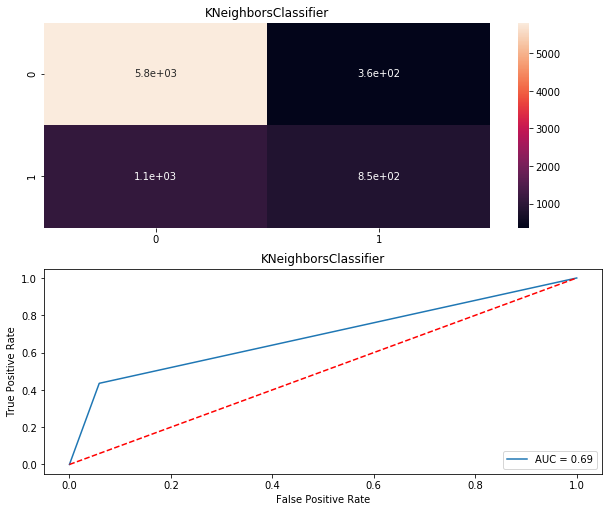

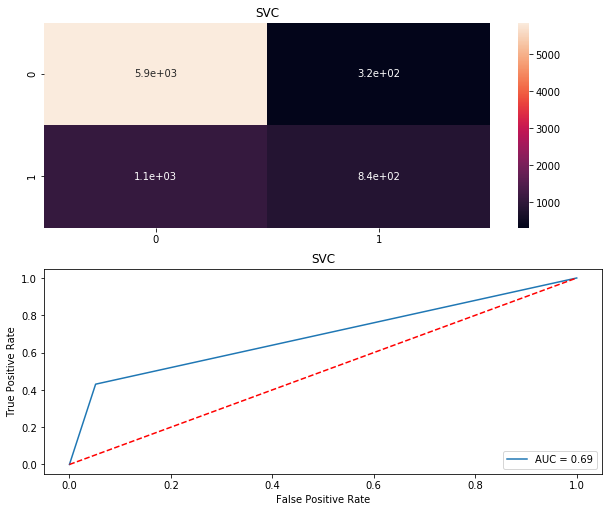

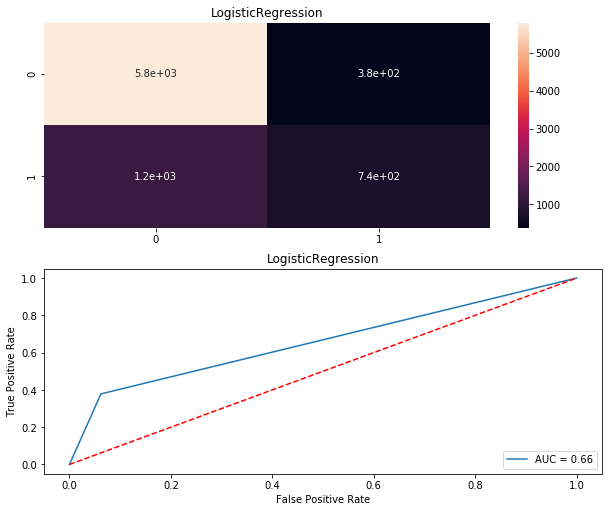

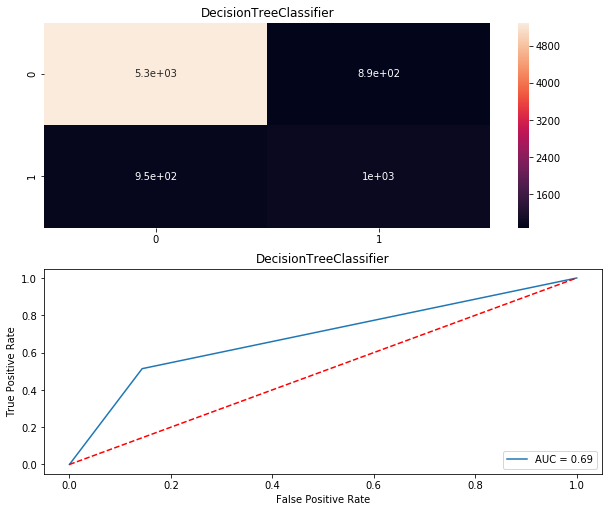

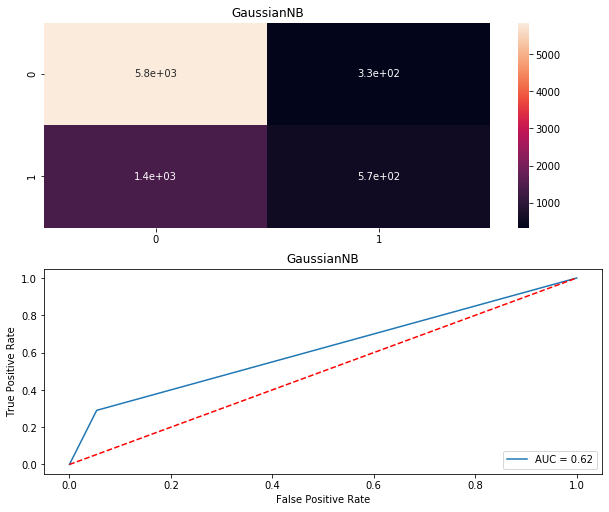

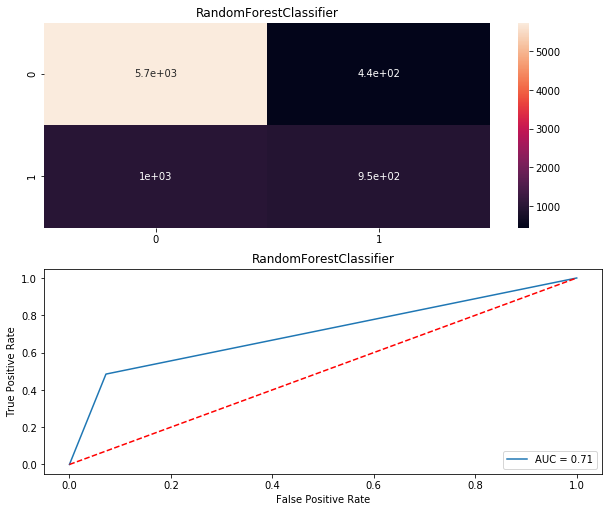

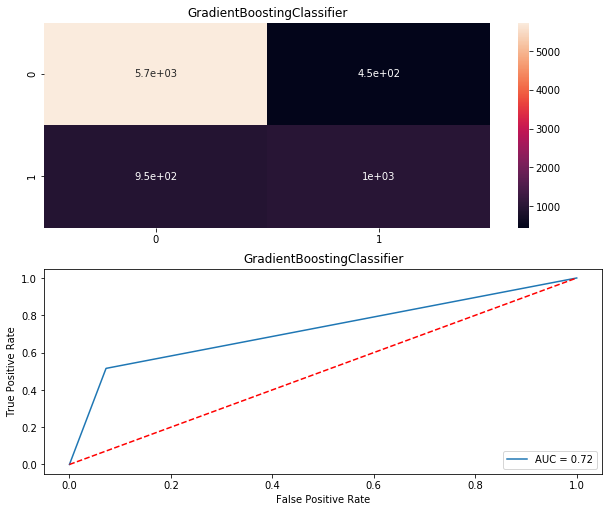

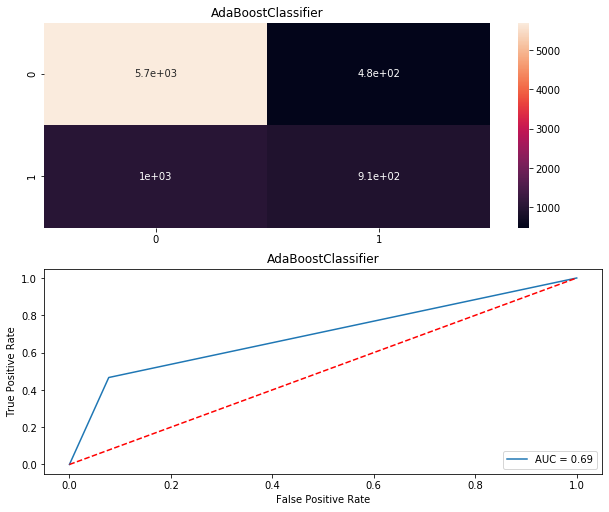

In [42]:
Model = []
score = []
cvs=[]
rocscore=[]
f1score=[]
ps=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pred)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    f1s=f1_score(y_test,pred)
    print('F1_score=',f1s)
    f1score.append(f1s*100)
    print('\n')
    precisionscore=precision_score(y_test,pred)
    print('Precision_score=',precisionscore)
    ps.append(precisionscore*100)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [43]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore,'F1_score':f1s,'Precision_score':ps})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve,F1_score,Precision_score
0,KNeighborsClassifier,81.943250,81.207596,68.823786,0.545183,70.148026
1,SVC,82.373173,81.858693,68.950124,0.545183,72.570937
2,LogisticRegression,80.321828,80.390670,65.822278,0.545183,65.896980
3,DecisionTreeClassifier,77.410638,76.447303,68.521650,0.545183,53.195985
4,GaussianNB,78.835524,78.732239,61.829657,0.545183,63.152053
5,RandomForestClassifier,82.127503,81.081678,70.634953,0.545183,68.100358
6,GradientBoostingClassifier,82.852229,82.092097,72.157476,0.545183,69.368132
7,AdaBoostClassifier,81.267658,81.133891,69.441549,0.545183,65.613783


In [44]:
#Lets use GridsearchCV for hyperparamenter tuning for GradientBoostingClassifier
def maxacc_score(regr,x,y):
    max_acc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.25,stratify=y)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        acc_scr=accuracy_score(y_test,y_pred)
        if acc_scr>max_acc_score:
            max_acc_score=acc_scr
            final_r_state=r_state
    print("max accuracy score corresponding to ",final_r_state," is ",max_acc_score)
    return final_r_state

In [45]:
pipeline=Pipeline([("ss",StandardScaler()),("GBC",GradientBoostingClassifier())])
parameters = {"GBC__n_estimators":[10,100,200,300,400,500]}
clf = GridSearchCV(pipeline, parameters, cv=5,scoring="roc_auc")
clf.fit(x,y)
clf.best_params_

{'GBC__n_estimators': 300}

In [47]:
pipeline_GBC=Pipeline([("ss",StandardScaler()),("GBC",GradientBoostingClassifier(n_estimators=300))])
maxacc_score(pipeline_GBC,x,y)

max accuracy score corresponding to  85  is  0.8309789952094337


85

In [48]:
from sklearn.externals import joblib
joblib.dump(GBC,"Census_Data_GBC.pkl")

['Census_Data_GBC.pkl']